In [1]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [3]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [4]:
batch_size = 64
epochs = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 106 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 8 images belonging to 1 classes.


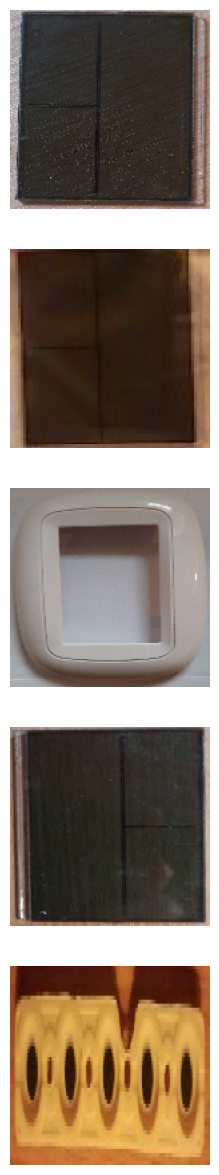

In [6]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 106 images belonging to 4 classes.


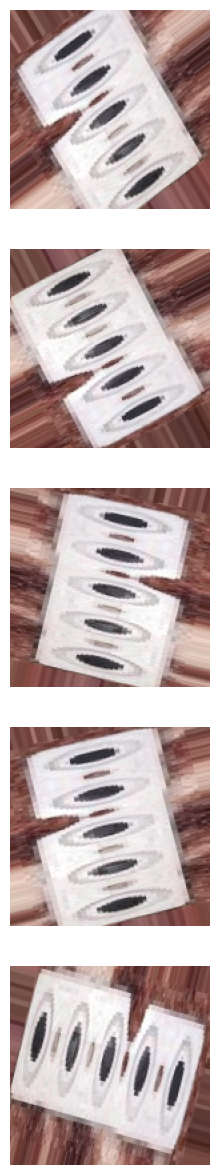

In [7]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 106 images belonging to 4 classes.


In [9]:
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(64, input_dim=784))
model.add(Dense(32, input_dim=784))
model.add(Dropout(.2))
model.add(Dense(4, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 64)                5607488   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [11]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 2,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/32
2/2 [==============================] - 2s 797ms/step - loss: 15.5778 - accuracy: 0.2358 - val_loss: 8.6540 - val_accuracy: 0.4375
Epoch 2/32
2/2 [==============================] - 1s 369ms/step - loss: 13.0323 - accuracy: 0.2264 - val_loss: 4.7699 - val_accuracy: 0.2500
Epoch 3/32
2/2 [==============================] - 1s 363ms/step - loss: 3.5223 - accuracy: 0.3302 - val_loss: 1.2097 - val_accuracy: 0.5000
Epoch 4/32
2/2 [==============================] - 1s 674ms/step - loss: 1.1915 - accuracy: 0.5377 - val_loss: 0.9175 - val_accuracy: 0.5000
Epoch 5/32
2/2 [==============================] - 1s 644ms/step - loss: 1.0168 - accuracy: 0.5849 - val_loss: 0.8424 - val_accuracy: 0.6562
Epoch 6/32
2/2 [==============================] - 1s 654ms/step - loss: 0.9121 - accuracy: 0.6321 - val_loss: 0.7309 - val_accuracy: 0.7500
Epoch 7/32
2/2 [==============================] - 1s 361ms/step - loss: 0.8749 - accuracy: 0.6981 - val_loss: 0.6145 - val_accuracy: 0.7500
Epoch 8/32
2/2 [==

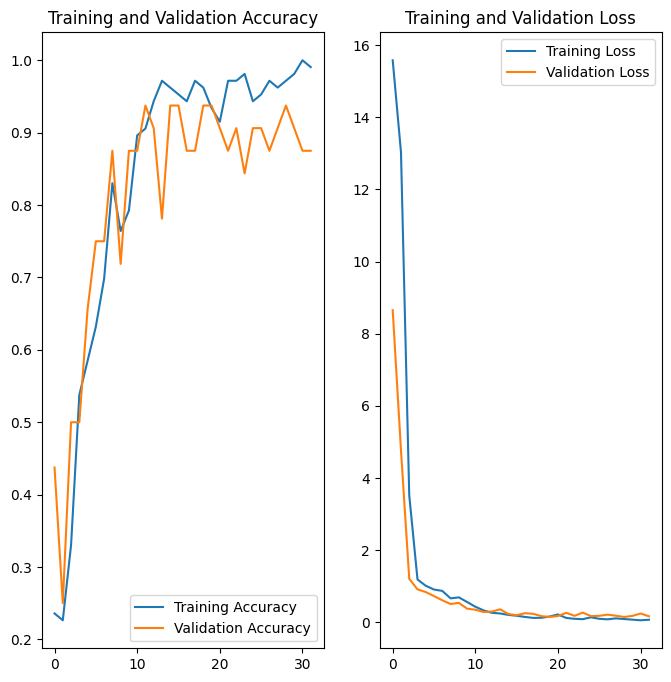

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
#save model

model.save('./saved_model/test.h5')

In [67]:
model = tf.keras.models.load_model('saved_model/test.h5')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 87616)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                5607488   
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                     

1/1 [==============================] - 0s 107ms/step


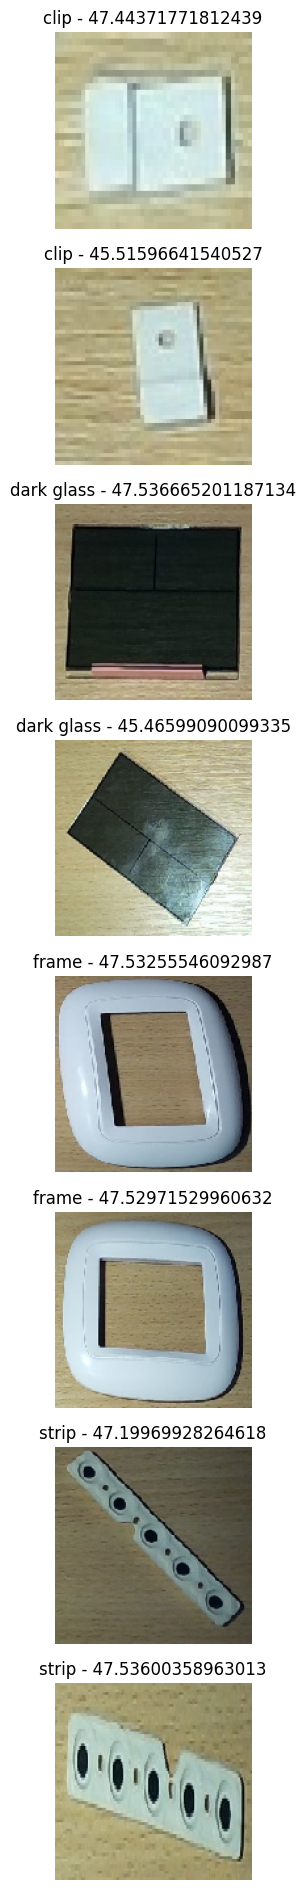

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)

predictionPercent = []
predictionLabel = []
name = ["clip", "dark glass", "frame", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
